Appendix I

import os
import pandas as pd
import numpy as np

from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/MyDrive/DSO574 - Final Project"
os.chdir(path)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
data = '/content/drive/MyDrive/DSO574 - Final Project/Reel Good Data (Title+Service+Genre+Tag List).csv'
data = pd.read_csv(data)
data.head()

Unnamed: 0            Title                         URL Type  Service  \
0           0     Breaking Bad     /show/breaking-bad-2008   tv  netflix   
1           1     Breaking Bad     /show/breaking-bad-2008   tv  netflix   
2           2  Game of Thrones  /show/game-of-thrones-2011   tv  hbo_max   
3           3  Game of Thrones  /show/game-of-thrones-2011   tv  hbo_max   
4           4  Game of Thrones  /show/game-of-thrones-2011   tv  hbo_max   

                Genre                                                Tag  \
0               Crime  ['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...   
1               Drama  ['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...   
2               Drama  ['War', 'Royalty', 'Political', 'Based on Book...   
3  Action & Adventure  ['War', 'Royalty', 'Political', 'Based on Book...   
4             Fantasy  ['War', 'Royalty', 'Political', 'Based on Book...   

   IMDB  ReelGood AgeRating  Rated  Released Year Duration Year  Seasons  \
0   9.5     100.0       18+  TV-MA           2008     2008-2020      5.0   
1   9.5     100.0       18+  TV-MA           2008     2008-2020      5.0   
2   9.3      98.0       18+  TV-MA           2011     2011-2020      8.0   
3   9.3      98.0       18+  TV-MA           2011     2011-2020      8.0   
4   9.3      98.0       18+  TV-MA           2011     2011-2020      8.0   

                                     What it's about  \
0  When Walter White, a New Mexico chemistry teac...   
1  When Walter White, a New Mexico chemistry teac...   
2  Seven noble families fight for control of the ...   
3  Seven noble families fight for control of the ...   
4  Seven noble families fight for control of the ...   

                                      Where to Watch  Rent or Buy Available  \
0  62 episodes (100%) are available to stream on ...                      1   
1  62 episodes (100%) are available to stream on ...                      1   
2  74 episodes (100%) are available to stream on ...                      1   
3  74 episodes (100%) are available to stream on ...                      1   
4  74 episodes (100%) are available to stream on ...                      1   

   Exclusive Service  Has Tag  
0                  0        1  
1                  0        1  
2                  0        1  
3                  0        1  
4                  0        1

In [ ]:
data.describe()

Unnamed: 0           IMDB       ReelGood  Released Year  \
count  287834.000000  283312.000000  286904.000000  287834.000000   
mean   143916.500000       6.118687      48.807793    2002.764830   
std     83090.663028       1.339057      15.625157      19.746377   
min         0.000000       1.000000      10.000000    1900.000000   
25%     71958.250000       5.300000      36.000000    1999.000000   
50%    143916.500000       6.300000      46.000000    2011.000000   
75%    215874.750000       7.100000      60.000000    2015.000000   
max    287833.000000      10.000000     100.000000    2020.000000   

            Seasons  Rent or Buy Available  Exclusive Service        Has Tag  
count  23047.000000          287834.000000      287834.000000  287834.000000  
mean       4.335011               0.857300           0.204819       0.513643  
std        5.607982               0.349768           0.403570       0.499815  
min        1.000000               0.000000           0.000000       0.000000  
25%        1.000000               1.000000           0.000000       0.000000  
50%        3.000000               1.000000           0.000000       1.000000  
75%        5.000000               1.000000           0.000000       1.000000  
max       86.000000               1.000000           1.000000       1.000000

## Analyze what types of content streaming platforms seek

In [ ]:
content_types = data['Type'].value_counts()
print(content_types)

Type
movies    237158
tv         50676
Name: count, dtype: int64


In [ ]:
exclusive_content = data[data['Exclusive Service'] == 1]['Service'].value_counts()
print(exclusive_content)

Service
Rent or Buy              42572
netflix                   6042
amazon_prime              1810
fandor                    1731
criterion_channel         1110
                         ...  
tlc_go                       1
fx_tveverywhere              1
tbs                          1
paramount_network_tve        1
discovery_life_go            1
Name: count, Length: 71, dtype: int64


In [ ]:
high_rated_content = data[(data['IMDB'] > 8) & (data['ReelGood'] > 80)]
print(high_rated_content)

       Unnamed: 0                        Title  \
0               0                 Breaking Bad   
1               1                 Breaking Bad   
2               2              Game of Thrones   
3               3              Game of Thrones   
4               4              Game of Thrones   
...           ...                          ...   
57636       57636  A Woman Under the Influence   
57637       57637  A Woman Under the Influence   
59817       59817                     Drishyam   
59818       59818                     Drishyam   
59819       59819                     Drishyam   

                                           URL    Type      Service  \
0                      /show/breaking-bad-2008      tv      netflix   
1                      /show/breaking-bad-2008      tv      netflix   
2                   /show/game-of-thrones-2011      tv      hbo_max   
3                   /show/game-of-thrones-2011      tv      hbo_max   
4                   /show/game-of-thrones-20

##Identify content types that are not currently offered and potential gaps in the market

In [ ]:
data.drop_duplicates(subset=['Title', 'Service', 'Type'], inplace=True)

In [ ]:
tag_counts = data['Tag'].value_counts()
print(tag_counts)

Tag
[nan]                                                                                                             19411
[nan, nan]                                                                                                        12243
[nan, nan, nan]                                                                                                   11030
[nan, nan, nan, nan]                                                                                               9970
[nan, nan, nan, nan, nan]                                                                                          5453
                                                                                                                  ...  
['Animal', 'Sports', 'Disney', 'War']                                                                                 1
['Princess', 'Teen', 'Royalty', 'Political', 'Music', 'Disney']                                                       1
['Supernatural', 'Adaptation', 'Apoc

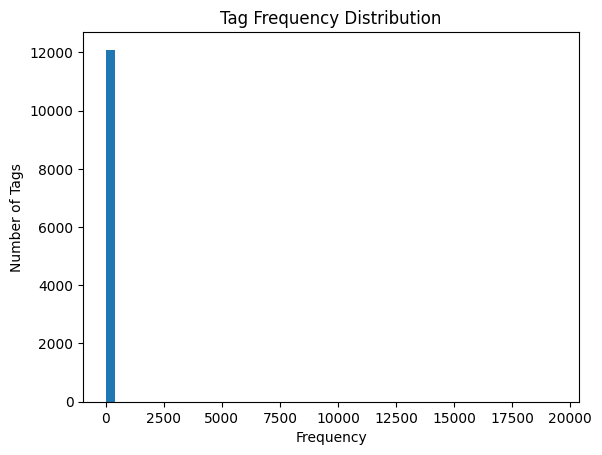

In [ ]:
import matplotlib.pyplot as plt

tag_counts.plot(kind='hist', bins=50, title='Tag Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Number of Tags')

threshold = tag_counts.quantile(0.10)

potential_gaps = tag_counts[tag_counts < threshold]

In [ ]:
data['IMDB'] = pd.to_numeric(data['IMDB'], errors='coerce')
data['ReelGood'] = pd.to_numeric(data['ReelGood'], errors='coerce')
data['Released Year'] = pd.to_datetime(data['Released Year'], format='%Y', errors='coerce')

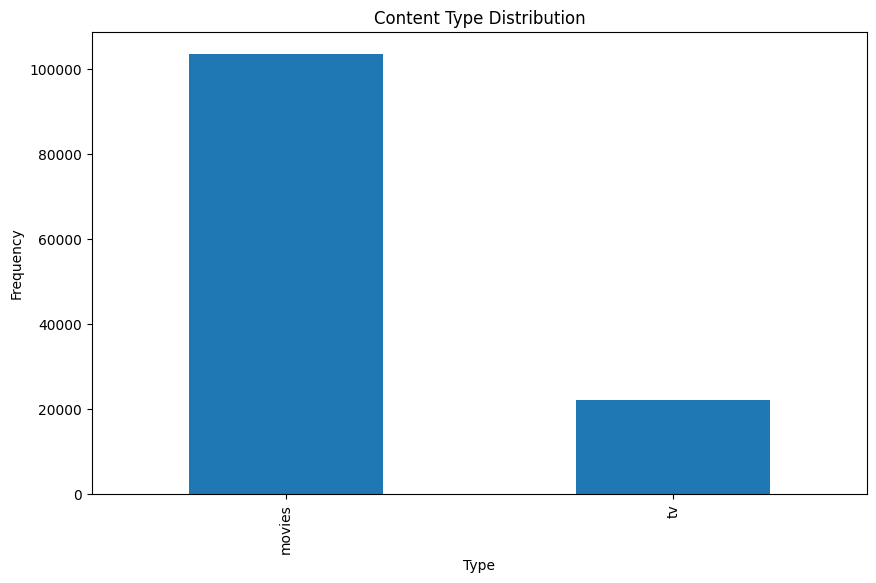

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['Type'].value_counts().plot(kind='bar')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

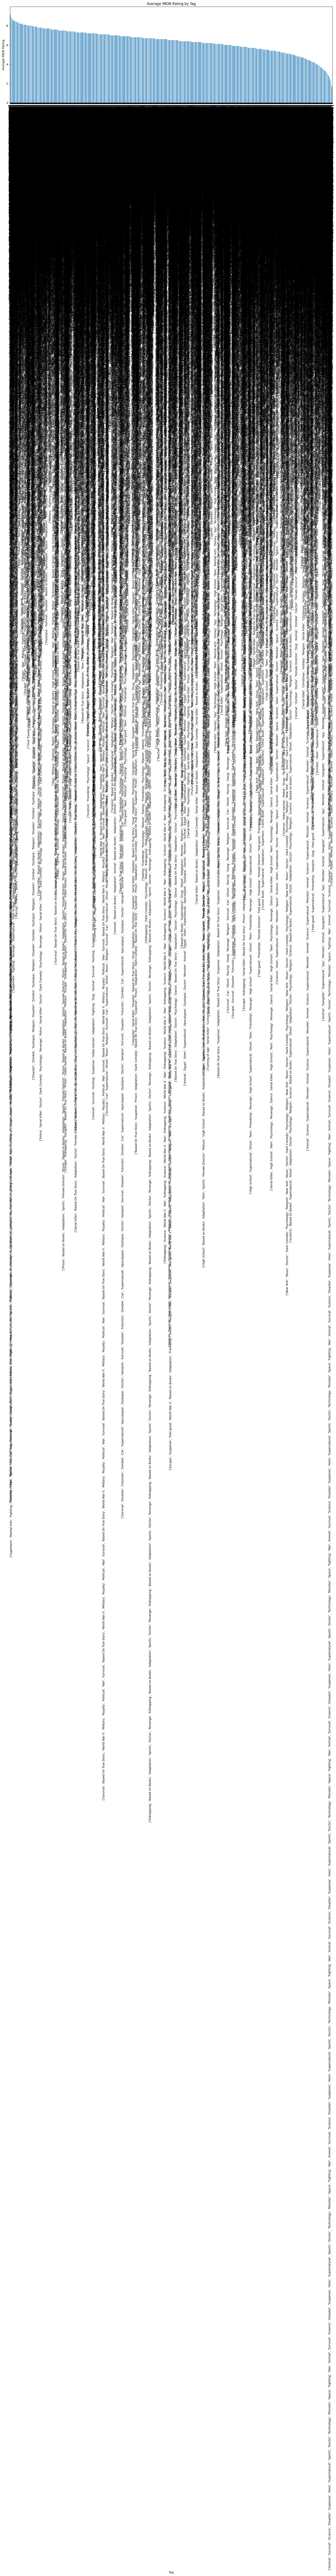

In [ ]:
tag_ratings = data.groupby('Tag')['IMDB'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
tag_ratings.plot(kind='bar')
plt.title('Average IMDB Rating by Tag')
plt.xlabel('Tag')
plt.ylabel('Average IMDB Rating')
plt.show()

##Analyze which TV shows are successful in the streaming space

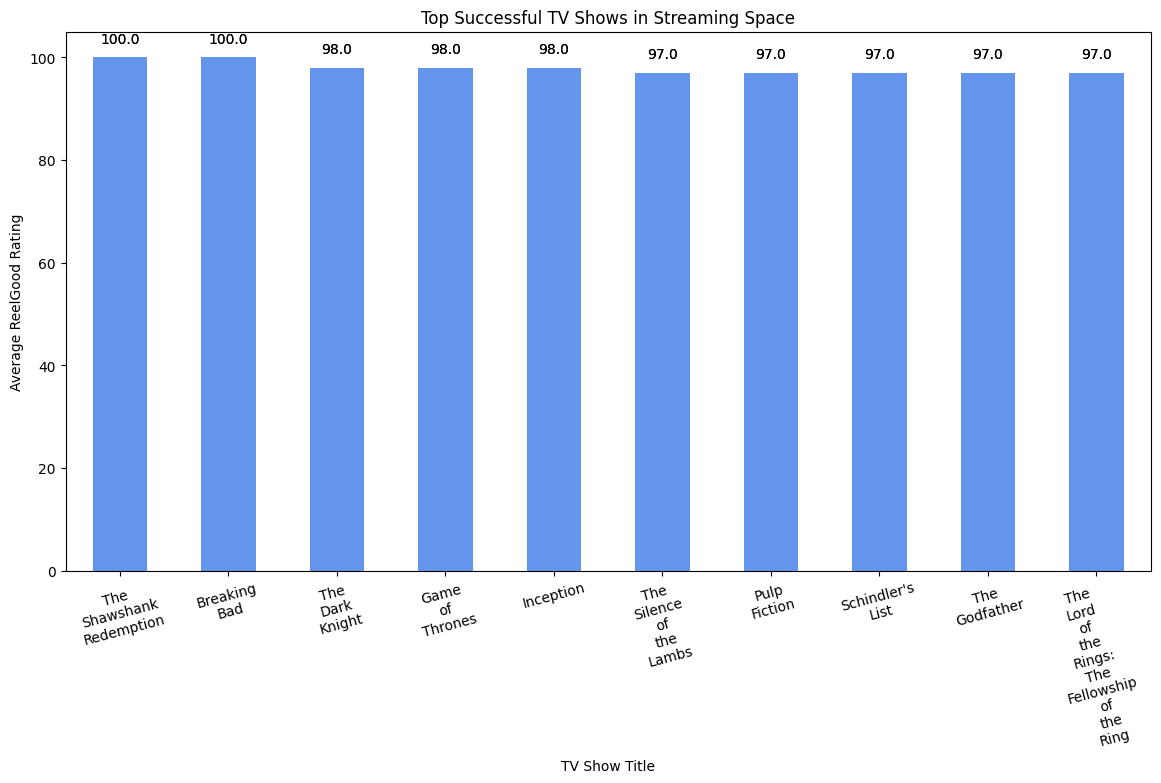

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
streaming_success = data.groupby('Title').agg({ 'IMDB': 'mean', 'ReelGood': 'mean','Seasons': 'max'}).sort_values(by='ReelGood', ascending=False)
streaming_success.head(10)['ReelGood'].plot(kind='bar')
ax = streaming_success.head(10)['ReelGood'].plot(kind='bar', color='cornflowerblue',figsize=(14, 7))
x_labels = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticklabels([label if len(label) < 10 else '\n'.join(label.split()) for label in x_labels],
                   rotation=0, ha='center')

# Set the title and labels of the plot
plt.title('Top Successful TV Shows in Streaming Space')
plt.xlabel('TV Show Title')
plt.ylabel('Average ReelGood Rating')

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=15)

# Add the numerical values above each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f'),  # One decimal place
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', xytext=(0, 8), textcoords='offset points')

plt.show()


Pie chart for top shows genre

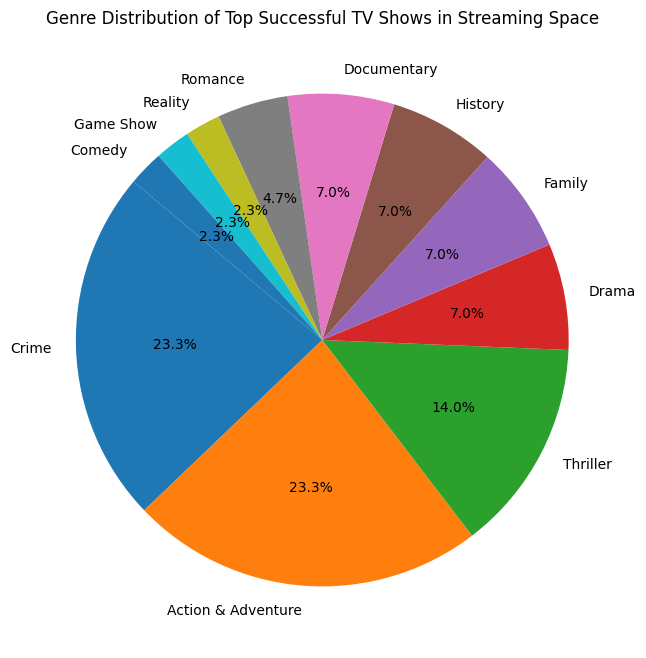

In [ ]:
# List of successful TV shows from your analysis
titles = [
    "Breaking Bad", "Game of Thrones", "Rick and Morty", "Stranger Things",
    "The Boys", "Chernobyl", "Fargo", "Dark", "Sherlock", "Avatar: The Last Airbender",
    "Horizon", "The Colbert Report", "MTV Unplugged", "Would I Lie to You?",
    "Victoria's Secret Fashion Show", "8 Out of 10 Cats Does Countdown",
    "Yunus Emre: Aşkın Yolculuğu", "Ultraman", "Gunsmoke"
]

# Filter data to only include the selected shows
selected_shows = data[data['Title'].isin(titles)]

# Count the occurrences of each genre
genre_counts = selected_shows['Genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution of Top Successful TV Shows in Streaming Space')
plt.show()

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'streaming_success' has been computed as before.
ax = streaming_success.head(10)['ReelGood'].plot(kind='bar', figsize=(10, 8), color=['blue', 'green'])

# Set the title and labels of the plot with specific style
plt.title('Top Successful TV Shows in Streaming Space', fontsize=14, weight='bold')
plt.xlabel('TV Show Title', fontsize=12)
plt.ylabel('Average ReelGood Rating', fontsize=12)

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0, fontsize=10)

# Set the y-axis labels font size
plt.yticks(fontsize=10)

# Change the background style
sns.set_style("whitegrid")

# Add the numerical values above each bar with a loop
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.1f'),  # Format with one decimal place
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                fontsize=10)

# Show the legend if needed
plt.legend(['ReelGood Rating'], fontsize=10)

# Make the grid less prominent
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Show the plot
plt.show()


Score analysis

In [ ]:
exclusive_content = data[data['Exclusive Service'] == 1]
exclusive_content

In [ ]:
seasons_threshold = 10
shows_with_more_than_10_seasons = data[data['Seasons'] > seasons_threshold]
shows_with_more_than_10_seasons

In [ ]:
data = data.dropna(subset=['Seasons'])
# Filter for exclusive content
exclusive_content = data[data['Exclusive Service'] == 1]

# Filter for shows with more than 10 seasons
shows_with_more_than_10_seasons = data[data['Seasons'] > 10]

# Combine both filters to get shows that are exclusive and have more than 10 seasons
exclusive_long_running_shows = exclusive_content[exclusive_content['Title'].isin(shows_with_more_than_10_seasons['Title'])]

# Now, assuming that 'IMDB' and 'Seasons' are already aggregated by 'Title' for each show
# Get the top 10 shows by IMDB rating
top_shows = exclusive_long_running_shows.sort_values(by='IMDB', ascending=False).head(10)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for IMDB ratings
ax1.bar(top_shows['Title'], top_shows['IMDB'], color='skyblue', label='IMDB Rating')

# Set the x-axis labels and rotate them if they're too long
ax1.set_xticklabels(top_shows['Title'], rotation=45, ha='right')
ax1.set_xlabel('TV Show Title')
ax1.set_ylabel('IMDB Rating')

# Line plot for the number of seasons
ax2 = ax1.twinx()
ax2.plot(top_shows['Title'], top_shows['Seasons'], color='green', label='Seasons', marker='o')
ax2.set_ylabel('Seasons')

# Title and legend
plt.title('Top 10 Exclusive Shows with More Than 10 Seasons')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [ ]:
print(data[data['Title'].str.contains('The Prince of Tennis')]['Seasons'])